In [29]:
import pandas as pd
import numpy as np
import spacy

# Read Data

In [30]:
df = pd.read_csv("Fake_Real_Data.csv")
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [31]:
df.shape

(9900, 2)

In [32]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [33]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [34]:
df['label_num'] = df.label.map({
    'Fake': 0,
    'Real': 1
})

In [35]:
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.Text, df.label_num, test_size=0.2, random_state=2022)

In [38]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (7920,)
X_test shape:  (1980,)


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Train with actual data

## KNN nn=10 metric euclidian unigram, bigrams and trigrams

In [40]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('knn', KNeighborsClassifier(n_neighbors=10,metric='euclidean'))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.47      0.63      1024
           1       0.63      0.98      0.77       956

    accuracy                           0.72      1980
   macro avg       0.80      0.73      0.70      1980
weighted avg       0.81      0.72      0.70      1980



## KNN nn=10 metric cosine unigram, bigrams and trigrams

In [41]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('knn', KNeighborsClassifier(n_neighbors=10,metric='cosine'))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77      1024
           1       0.71      1.00      0.83       956

    accuracy                           0.80      1980
   macro avg       0.85      0.81      0.80      1980
weighted avg       0.86      0.80      0.80      1980



## RandomForestClassifier only trigram

In [42]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('rf', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1024
           1       0.99      0.99      0.99       956

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



## RandomForestClassifier both unigram and bigrams

In [43]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('rf', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1024
           1       1.00      0.99      1.00       956

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



## Multinomial Naive Bayes alpha 0.75 both unigram and bigrams

In [44]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('nb', MultinomialNB(alpha=0.75))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1024
           1       0.99      0.99      0.99       956

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



# Train with processed data

In [45]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [46]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [47]:
df['preprocessed_txt'] = df.Text.apply(preprocess)

In [48]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump Surrogate BRUTALLY Stabs Pathetic vide...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow million illegally pu...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.preprocessed_txt, df.label_num, test_size=0.2, random_state=2022)

## RandomForestClassifier only triagrams

In [50]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('rf', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1024
           1       0.99      0.91      0.95       956

    accuracy                           0.95      1980
   macro avg       0.96      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



## RandomForestClassifier only unigram, bigrams and trigrams

In [51]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('rf', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1024
           1       1.00      0.99      1.00       956

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



## Confusion Matrix Plotting

In [52]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1023,    1],
       [   7,  949]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

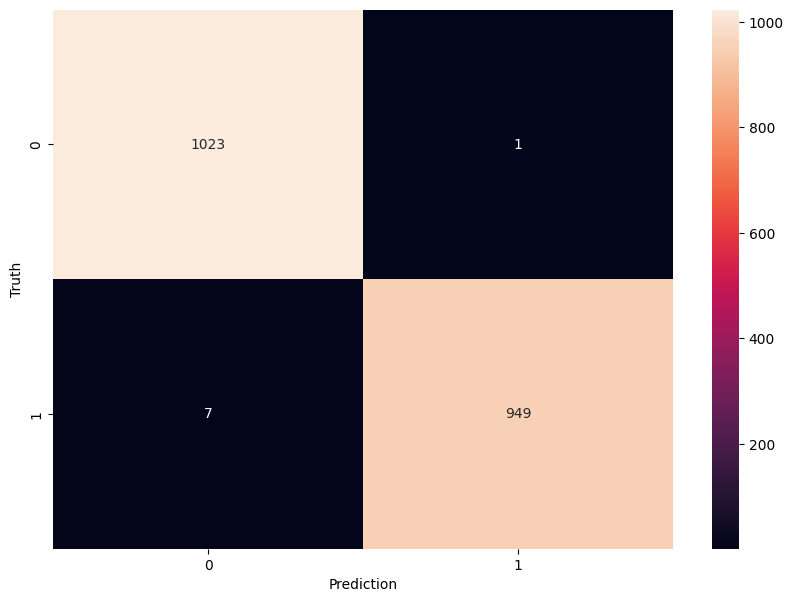

In [54]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")